In [1]:
import numpy as np
import cv2
import random
import pandas as pd
import time


import matplotlib.pyplot as plt
from seaborn import load_dataset

# Coseno

In [2]:
path= '/home/miguel/Descargas/Proyecto Tesis/'
pathReferencia ='Imagenes Originales Gris/lena_gray.png'
pathRuido='lena/lena_gray_512_512_variance_400.png'
imagenReferencia = cv2.imread(path+pathReferencia)
imagenReferenciaGris = cv2.cvtColor(imagenReferencia, cv2.COLOR_RGB2GRAY)
imagenRuido = cv2.imread(path+pathRuido)
imagenRuidoGris = cv2.cvtColor(imagenRuido, cv2.COLOR_RGB2GRAY)

In [3]:
def transformadaCosenoDisplay(imagenReferencia):
    img1 = imagenReferencia.astype('float')
 
    C_temp = np.zeros(imagenReferencia.shape)
    dst = np.zeros(imagenReferencia.shape)
 
    m, n = imagenReferencia.shape
    N = n
    C_temp[0, :] = 1 * np.sqrt(1/N)
 
    for i in range(1, m):
         for j in range(n):
                C_temp[i, j] = np.cos(np.pi * i * (2*j+1) / (2 * N )) * np.sqrt(2 / N )
            
    dst = np.dot(C_temp , img1)
    dst = np.dot(dst, np.transpose(C_temp))
    return dst

    

[[226 118 179 179 237 165 169 121]
 [120 133 175 199 213 213 141 122]
 [174  65 152 199 137  93 192 201]
 [109 178 146 211 238 123 184 250]
 [137 141 177 228 206 162 233 240]
 [ 79 123 153 184 184  35 255 130]
 [197 131 213 160 156  76 166 171]
 [199 140  67 194 172 186 113 132]] Imagen Original
[[ 1.31275000e+03 -6.32616421e+01 -6.85661926e+01 -4.12141202e+01
   1.13500000e+02  6.99631164e+01 -6.03551135e+01  6.61089879e+01]
 [ 4.38202610e+01 -1.20600596e+01 -4.98473069e+01  2.66888859e+01
  -3.63931400e+00 -5.28166962e+00  4.56275295e+01  1.29485774e+01]
 [-4.42158678e+01  1.09965400e+02 -1.82757576e+01  1.28156212e+02
  -9.55058838e-01  2.19121829e+00  7.05743776e+01 -2.02163757e+01]
 [ 2.26990189e+01  5.77453972e+00 -2.57826925e+01 -2.19810868e+01
  -4.71043897e+01  2.45072855e+01 -4.28168363e+01  8.36182024e+01]
 [ 7.72500000e+01 -1.35576402e+01 -3.81440263e+00  5.97495811e+01
   3.60000000e+01 -5.84749499e+01  3.20356560e+00 -5.25902384e+01]
 [ 7.03429314e-01  3.65885346e+01  5.8

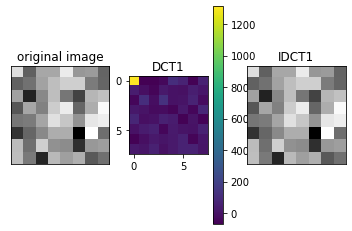

In [14]:
imagenReferencia = imagenRuidoGris[0:0+8, 0: 0+8]
print(imagenReferencia,'Imagen Original')

img1 = imagenReferencia.astype('float')
 
C_temp = np.zeros(imagenReferencia.shape)
dst = np.zeros(imagenReferencia.shape)
 
m, n = imagenReferencia.shape
N = n
C_temp[0, :] = 1 * np.sqrt(1/N)
for i in range(1, m):
     for j in range(n):
            C_temp[i, j] = np.cos(np.pi * i * (2*j+1) / (2 * N )) * np.sqrt(2 / N )
            
dst = np.dot(C_temp , img1)
dst = np.dot(dst, np.transpose(C_temp))

# print(C_temp)

# print(np.transpose(C_temp))
print(dst,'Imagen DCT')

dst1 = 20*np.log (abs (dst)) #hacer procesamiento de registro
print(dst1,'Imagen DCT Log abs')

img_recor = np.dot(np.transpose(C_temp) , dst)
img_recor1 = np.dot(img_recor, C_temp)
 
 #Trae tu propio método
 
img_dct = cv2.dct (img1) # Realizar transformada de coseno discreta
 
img_dct_log = np.log (abs (img_dct)) #hacer procesamiento de registro
 
img_recor2 = cv2.idct (img_dct) # Realizar transformada coseno discreta inversa
 
plt.subplot(131)
plt.imshow(img1, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])
 
plt.subplot(132)
plt.imshow(dst)
plt.colorbar()
plt.title('DCT1')
# plt.xticks([]), plt.yticks([])
 
plt.subplot(133)
plt.imshow(img_recor1, 'gray')
plt.title('IDCT1')
plt.xticks([]), plt.yticks([])
  
plt.show()

El rango dinámico del espectro de una imagen es, en general, está fuera del rango para reproducir un monitor o pantalla de visualización, por lo que sólo son visibles las zonas con intensidad más elevada en la imagen. 

Para compensarlo, la visualización del espectro se realiza aplicando la función:

\begin{equation}
D(u,v) = log |C(u,v)|
\end{equation}

De esta forma, la función logarítmica realiza una compresión del rango dinámico, facilitándose
considerablemente la visualización e interpretación del espectro de Coseno.

In [5]:
# imagenActual = imgAct[posicionAltoImagenActual:posicionAltoImagenActual+tamParche, posicionAnchoImagenActual: posicionAnchoImagenActual+tamParche]
imagenActualBlur = cv2.GaussianBlur(imagenReferencia,(3,3),0)
imagenActualBlur

array([[149, 150, 167, 195, 207, 190, 155, 138],
       [136, 139, 162, 190, 191, 176, 159, 151],
       [127, 130, 156, 185, 174, 155, 170, 185],
       [136, 142, 166, 196, 187, 163, 189, 217],
       [131, 143, 171, 199, 188, 169, 197, 221],
       [126, 139, 167, 184, 158, 141, 175, 198],
       [150, 148, 157, 169, 150, 132, 149, 163],
       [167, 152, 148, 165, 159, 141, 140, 146]], dtype=uint8)

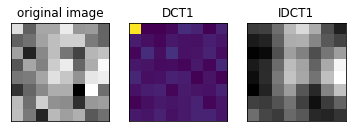

In [6]:
plt.subplot(131)
plt.imshow(img1, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])
 
plt.subplot(132)
plt.imshow(dst)
plt.title('DCT1')
plt.xticks([]), plt.yticks([])
 
plt.subplot(133)
plt.imshow(imagenActualBlur, 'gray')
plt.title('IDCT1')
plt.xticks([]), plt.yticks([])
  
plt.show()

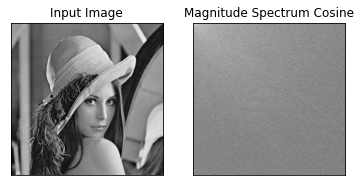

True

In [7]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')
 
imF = dct2(imagenReferenciaGris)

img_dct_log = 30*np.log(abs(imF))
#print(img_dct_log)
plt.subplot(121),plt.imshow(imagenReferenciaGris, cmap= 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_dct_log, cmap = 'gray')
plt.title('Magnitude Spectrum Cosine'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('Cosine_Lenna.png',img_dct_log)

# Fourier

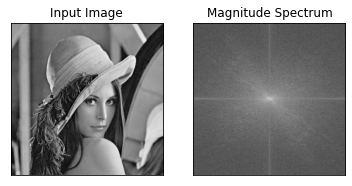

True

In [8]:
imgD64 = np.float64(imagenReferenciaGris)
#print(imgD64)
Fourier = np.fft.fft2(imgD64)
#print(Fourier)
FourierShift = np.fft.fftshift(Fourier)
#print(FourierShift)
magnitude_spectrum = 20*np.log(np.abs(FourierShift))

#cv2_imshow(img_noise_400_grey)
#print('\n')
#cv2_imshow(magnitude_spectrum)
plt.subplot(121),plt.imshow(imagenReferenciaGris, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('Fourier_Lenna.png', magnitude_spectrum)

In [1]:
imagenReferenciaFourier = imagenRuidoGris[0:0+8, 0: 0+8]
img1_Fourier = imagenReferencia.astype('float')
print(img1_Fourier,'Pixeles')
#C_temp = np.zeros(imagenReferencia.shape)
#dst = np.zeros(imagenReferencia.shape)

#imgD64 = np.float64(imagenReferenciaGris)
#print(imgD64)
Fourier = np.fft.fft2(img1_Fourier)
#print(Fourier)
FourierShift = np.fft.fftshift(Fourier)
print(FourierShift,'Fourier_Shift')
#print(FourierShift)

realFourierData = np.zeros((len(imagenReferenciaFourier), len(imagenReferenciaFourier)))

for i in range(len(realFourierData)):
    for j in range(len(realFourierData)):
        realFourierData[i,j] = FourierShift[i,j].real

print(realFourierData,'Fourier_Real_Part')

magnitude_spectrum = 20*np.log(np.abs(FourierShift))
print(magnitude_spectrum,'Fourier_espectro')

plt.subplot(131)
plt.imshow(img1, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])
 
plt.subplot(132)
plt.imshow(magnitude_spectrum)
plt.colorbar()
plt.title('Fourier')
plt.xticks([]), plt.yticks([])
 
plt.subplot(133)
plt.imshow(magnitudeFirst)
plt.title('Inversa Fourier')
plt.xticks([]), plt.yticks([])
  
plt.show()

NameError: name 'imagenRuidoGris' is not defined

# Hadamard

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


In [10]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(imagenReferenciaGris, 'bior1.3')

LL, (LH, HL, HH) = coeffs2
print(LL,LH, HL, HH)
img_Wavelet_log = np.log(abs(coeffs2))

plt.subplot(121),plt.imshow(imagenReferenciaGris, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(coeffs2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
# LL, (LH, HL, HH) = coeffs2
# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()

[[324.125     324.125     323.625     ... 344.625     279.5
  279.5      ]
 [324.125     324.125     323.625     ... 344.625     279.5
  279.5      ]
 [323.859375  323.859375  324.2734375 ... 349.546875  286.0390625
  286.0390625]
 ...
 [ 89.90625    89.90625    98.25      ... 203.671875  196.1796875
  196.1796875]
 [ 88.1484375  88.1484375 106.71875   ... 204.7578125 214.140625
  214.140625 ]
 [ 88.1484375  88.1484375 106.71875   ... 204.7578125 214.140625
  214.140625 ]] [[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 ...
 [ 2.8125  2.8125  1.25   ... -1.0625 -2.125  -2.125 ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]] [[  0.       0.       1.     ...   1.      27.     -27.    ]
 [  0.       0.       1.     ...   1.      27.     -27.    ]
 [  0.       0.       0.875  ...   0.125   27.0625 -27.0625]
 ..

TypeError: bad operand type for abs(): 'tuple'